# Ancestry Composition 

In [4]:
import numpy as np 
import sklearn
from sklearn.decomposition import PCA
import pickle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import h5py
import scipy
import vcf
import allel
import sys
import random
random.seed(42)
import time
sns.set_style('white')
sns.set_style('ticks')
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.patches as mpatches


In [5]:
#load in our pickled data that contains population_dict samples
population_dict = pickle.load(open("populationcodes.pkl", "rb"))
#hard code all of our sample lists into lists so that we can use for our read_vcf function
FIN_samples = list(population_dict['FIN'])
CHS_samples = list(population_dict['CHS'])
GBR_samples = list(population_dict['GBR'])
PUR_samples = list(population_dict['PUR'])
CLM_samples = list(population_dict['CLM'])
MXL_samples = list(population_dict['MXL'])
TSI_samples = list(population_dict['TSI'])
LWK_samples = list(population_dict['LWK'])  
JPT_samples = list(population_dict['JPT'])
IBS_samples = list(population_dict['IBS'])
PEL_samples = list(population_dict['PEL'])
CDX_samples = list(population_dict['CDX'])
YRI_samples = list(population_dict['YRI'])
KHV_samples = list(population_dict['KHV']) 
ASW_samples = list(population_dict['ASW']) 
ACB_samples = list(population_dict['ACB']) 
CHB_samples = list(population_dict['CHB'])
GIH_samples = list(population_dict['GIH']) 
GWD_samples = list(population_dict['GWD']) 
PJL_samples = list(population_dict['PJL'])
MSL_samples = list(population_dict['MSL'])
BEB_samples = list(population_dict['BEB']) 
ESN_samples = list(population_dict['ESN'])
STU_samples = list(population_dict['STU'])
ITU_samples = list(population_dict['ITU']) 

#create a list of population sample code lists so that we can iterate through and call each subpopulation sample set into our VCF file. 
sample_names_ls = [FIN_samples,
CHS_samples,
GBR_samples,
PUR_samples,
CLM_samples,
MXL_samples,
TSI_samples,
LWK_samples,
JPT_samples,
IBS_samples,
PEL_samples,
CDX_samples,
YRI_samples,
KHV_samples,
ASW_samples,
ACB_samples,
CHB_samples,
GIH_samples,
GWD_samples,
PJL_samples,
MSL_samples,
BEB_samples,
ESN_samples,
STU_samples,
ITU_samples]

In [6]:
#create a function that takes in our population genotype at each position and adds together the amount of variant alleles that are present resulting in a (calls x samples) matrix size
def allele_counter(population_gt, population_size):
    population_new_gt = []
    for i in range(0,population_size): 
        new_gt = population_gt[:,i,0] + population_gt[:,i,1]
        population_new_gt.append(new_gt)
    return population_new_gt

In [9]:
#try calling our dataset for Finnish_in_Finland population
# callset = allel.read_vcf('ALL.chr21.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf',tabix = '/Users/AlexGaujean/Downloads/Genomics_Project/ALL.chr21.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf.gz.tbi', samples = FIN_samples) 

# #run our genotype functions on our specified Finnish callset
# #slice down our call dataset so we can work on it with more ease  
# # FIN_new_gt = allele_counter(FIN_gt_slice, 100)

# #run our callset data and subsequent functions for our Chinese population
callset_1 = allel.read_vcf('ALL.chr21.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf',tabix = '/Users/AlexGaujean/Downloads/Genomics_Project/vcf_zip_files/htslib-1.9/tabix.c' , samples = CHS_samples)
# #setup our CHS genotype call files
# CHS_new_gt = allele_counter(CHS_gt_slice, 92)
#setup a slice of our CHS file so that we can work with a more manageable set of data
# callset = allel.read_vcf('ALL.chr21.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf',tabix = '/Users/AlexGaujean/Downloads/Genomics_Project/ALL.chr21.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf.gz.tbi', samples = FIN_samples) 

# #call our GBR samples
# callset_2 = allel.read_vcf('ALL.chr21.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf',tabix = '/Users/AlexGaujean/Downloads/Genomics_Project/vcf_zip_files/htslib-1.9/tabix.c', samples = GBR_samples)


# #call our African in Southwest  samples
# callset_3 = allel.read_vcf('ALL.chr21.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf',tabix = '/Users/AlexGaujean/Downloads/Genomics_Project/vcf_zip_files/htslib-1.9/tabix.c', samples = ESN_samples)

# #call our Nigerian samples
# callset_4 = allel.read_vcf('ALL.chr21.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf',tabix = '/Users/AlexGaujean/Downloads/Genomics_Project/vcf_zip_files/htslib-1.9/tabix.c', samples = ACB_samples)

# #call our Peruvian population
# callset_5 = allel.read_vcf('ALL.chr21.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf',tabix = '/Users/AlexGaujean/Downloads/Genomics_Project/vcf_zip_files/htslib-1.9/tabix.c', samples = PEL_samples)


/Users/AlexGaujean/anaconda3/lib/python3.7/site-packages/allel/io/vcf_read.py:1631: UserWarning: some samples not found, will be ignored: 'HG00418', 'HG00427', 'HG00501', 'HG00512', 'HG00577', 'HG00578', 'HG00635', 'HG00702'
  ', '.join(map(repr, sorted(samples))))


-----------

In [10]:
#going to start by using a chunked array which doesnt store our data locally so we can work with it faster 
FIN_gt = allel.GenotypeChunkedArray(callset['calldata/GT'])
CHS_gt = allel.GenotypeChunkedArray(callset_1['calldata/GT'])

GBR_gt = allel.GenotypeChunkedArray(callset_2['calldata/GT'])
ESN_gt = allel.GenotypeChunkedArray(callset_3['calldata/GT'])

ACB_gt = allel.GenotypeChunkedArray(callset_4['calldata/GT'])
PEL_gt = allel.GenotypeChunkedArray(callset_5['calldata/GT'])

#store our Genotype arrays in a list
pop_gt_lst = [GBR_gt, ESN_gt, ACB_gt, PEL_gt]

In [80]:
FIN_gt

<GenotypeChunkedArray shape=(1045269, 100, 2) dtype=int8
   nbytes=199.4M
   values=numpy.ndarray>

In [82]:
population_dict

{'FIN': {'HG00171',
  'HG00173',
  'HG00174',
  'HG00176',
  'HG00177',
  'HG00178',
  'HG00179',
  'HG00180',
  'HG00181',
  'HG00182',
  'HG00183',
  'HG00185',
  'HG00186',
  'HG00187',
  'HG00188',
  'HG00189',
  'HG00190',
  'HG00266',
  'HG00267',
  'HG00268',
  'HG00269',
  'HG00270',
  'HG00271',
  'HG00272',
  'HG00273',
  'HG00274',
  'HG00275',
  'HG00276',
  'HG00277',
  'HG00278',
  'HG00280',
  'HG00281',
  'HG00282',
  'HG00284',
  'HG00285',
  'HG00306',
  'HG00308',
  'HG00309',
  'HG00310',
  'HG00311',
  'HG00312',
  'HG00313',
  'HG00315',
  'HG00318',
  'HG00319',
  'HG00320',
  'HG00321',
  'HG00323',
  'HG00324',
  'HG00325',
  'HG00326',
  'HG00327',
  'HG00328',
  'HG00329',
  'HG00330',
  'HG00331',
  'HG00332',
  'HG00334',
  'HG00335',
  'HG00336',
  'HG00337',
  'HG00338',
  'HG00339',
  'HG00341',
  'HG00342',
  'HG00343',
  'HG00344',
  'HG00345',
  'HG00346',
  'HG00349',
  'HG00350',
  'HG00351',
  'HG00353',
  'HG00355',
  'HG00356',
  'HG00357',
  'HG

In [11]:
def sample_count(pop_gt):
    pop_size = [] 
    for i in pop_gt:
        pop_size.append(i.shape[1]) 
    return pop_size
#run our function to store the sample count for each population that we have read into our data 
sample_size_lst = sample_count(pop_gt_lst) 
pop_gt_str = ['GBR_gt', 'ESN_gt', 'ACB_gt', 'PEL_gt']
sample_size_dict = dict(zip(pop_gt_str, sample_size_lst))

In [12]:
#count each sample size which we will need to use later when we are segmenting our variables
sample_size_lst = sample_count(pop_gt_lst) 
pop_gt_str = ['GBR_gt', 'ESN_gt', 'ACB_gt', 'PEL_gt']
sample_size_dict = dict(zip(pop_gt_str, sample_size_lst))
sample_size_dict
# sample_size_dict
#count the alleles for our chunked dataframes
# FIN_gt_ac= allele_counter(FIN_gt, 100) 
# CHS_gt_ac = allele_counter(CHS_gt, 92)

{'GBR_gt': 97, 'ESN_gt': 100, 'ACB_gt': 78, 'PEL_gt': 68}

In [16]:
#create a function that will calculate the allele counts for each population filter out the rows that don't have enough SNPs and return our GT array with relevant values
def pca_configuration(pop_1_gt, pop_2_gt, pop_3_gt, pop_4_gt, pop_5_gt, pop_6_gt):
    pop_allele_count = pop_1_gt.count_alleles()[:] + pop_2_gt.count_alleles()[:] + pop_3_gt.count_alleles()[:] + pop_4_gt.count_alleles()[:] + pop_5_gt.count_alleles()[:] + pop_6_gt.count_alleles()[:] 
    pop_cat = np.concatenate([pop_1_gt, pop_2_gt, pop_3_gt, pop_4_gt, pop_5_gt, pop_6_gt], axis = 1)
    pca_selection = pop_allele_count[:, :2].min(axis=1) > 1
    pop_cat = pop_cat.compress(pca_selection, axis=0)
    pop_cat = allel.GenotypeChunkedArray(pop_cat)
    pop_cat_filtered = pop_cat.to_n_alt() 
    indices = np.nonzero(pca_selection)[0]
    return pop_cat_filtered

In [18]:
#create pca ready dataset for GBR/ESN configuration
FIN_CHS_GBR_ESN_ACB_PEL_gt = pca_configuration(FIN_gt, CHS_gt, GBR_gt, ESN_gt, ACB_gt, PEL_gt)

In [79]:
gt = FIN_CHS_GBR_ESN_ACB_PEL_gt[:]
gt[:1000]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 

In [7]:
#add our two arrays together so we have one large array with all of our samples
FIN_CHS_gt = np.concatenate([FIN_gt, CHS_gt], axis=1)
#create an allele count for our columns and filter out the rows that are not that don't satisfy our requirements
ac = FIN_gt.count_alleles()[:] + CHS_gt.count_alleles()[:]
flt = ac[:, :2].min(axis=1) > 1

#recompress that back to our original file
FIN_CHS_gt_filtered = FIN_CHS_gt.compress(flt, axis=0)


In [8]:
#count the alternate alleles for our dataframe in each row
FIN_CHS_gt_filtered.shape
#turn our array into a gt chunked array object
FIN_CHS_gt_filtered = allel.GenotypeChunkedArray(FIN_CHS_gt_filtered)
#use the to_n_alt() method to compress our GenotypeChunkedArray
FIN_CHS_gt_filtered = FIN_CHS_gt_filtered.to_n_alt() 

-------------

# __Removing Correlated SNPs__

__Basepair Linkage__

A deeper understanding of the mechanisms that replicate our DNA sheds light on the issue of correlation. Base pair linkage, as it is referred to in the world of biology, means that certain SNPs will be correlated due to their proximity on the chromosome. This issue of segregating alleles is something that we must deal with before we input our data for PCA.

__Linkage Disequilibrium (LD)__  is the correlation between nearby variants such that the alleles at neighboring polymorphisms (observed on the same chromosome) are associated within a population more often than if they were unlinked.

In [19]:
from allel import plot as aplot
from allel import stats

In [20]:
#define a function that examines the linkage between SNPs in our sample through allel.rogers_huff_r method which is used to calculate variants that segregate together
def plot_ld(gn, title):
    m = allel.rogers_huff_r(gn) ** 2
    ax = aplot.pairwise_ld(m)
    ax.set_title(title)

In [ ]:
#examine a slice of our filtered_gt array where the dark spots represent a large value for our rogers_huff_r value which determines gene linkage
plot_ld(FIN_CHS_gt_filtered[:1000], 'Figure 1. Pairwise LD.')

*__Fig 1__. the dark spots on this pairwise graph is evidence that within our dataset we have SNPs that are segregating together*

In [26]:
#create a function that takes population_gt as input and prunes the variants to remove nucleotide polymorphisms that exhibit Linkage Disequilibrium
def ld_prune(gn, size, step, threshold=.1, n_iter=1):
    for i in range(n_iter):
        loc_unlinked = allel.locate_unlinked(gn, size=size, step=step, threshold=threshold)
        n = np.count_nonzero(loc_unlinked)
        print(n)
        n_remove = gn.shape[0] - n
        print('iteration', i+1, 'retaining', n, 'removing', n_remove, 'variants')
        gn = gn.compress(loc_unlinked, axis=0)
    return gn

In [77]:
#use a window size of 50 and step of 20 SNPs with a threshold of .1 for our r^2 value according to Rogers & Huff (2008)
FIN_CHS_gt_prune = ld_prune(FIN_CHS_gt_filtered, size=50, step=20, threshold=.1, n_iter=1)


NameError: name 'FIN_CHS_gt_filtered' is not defined

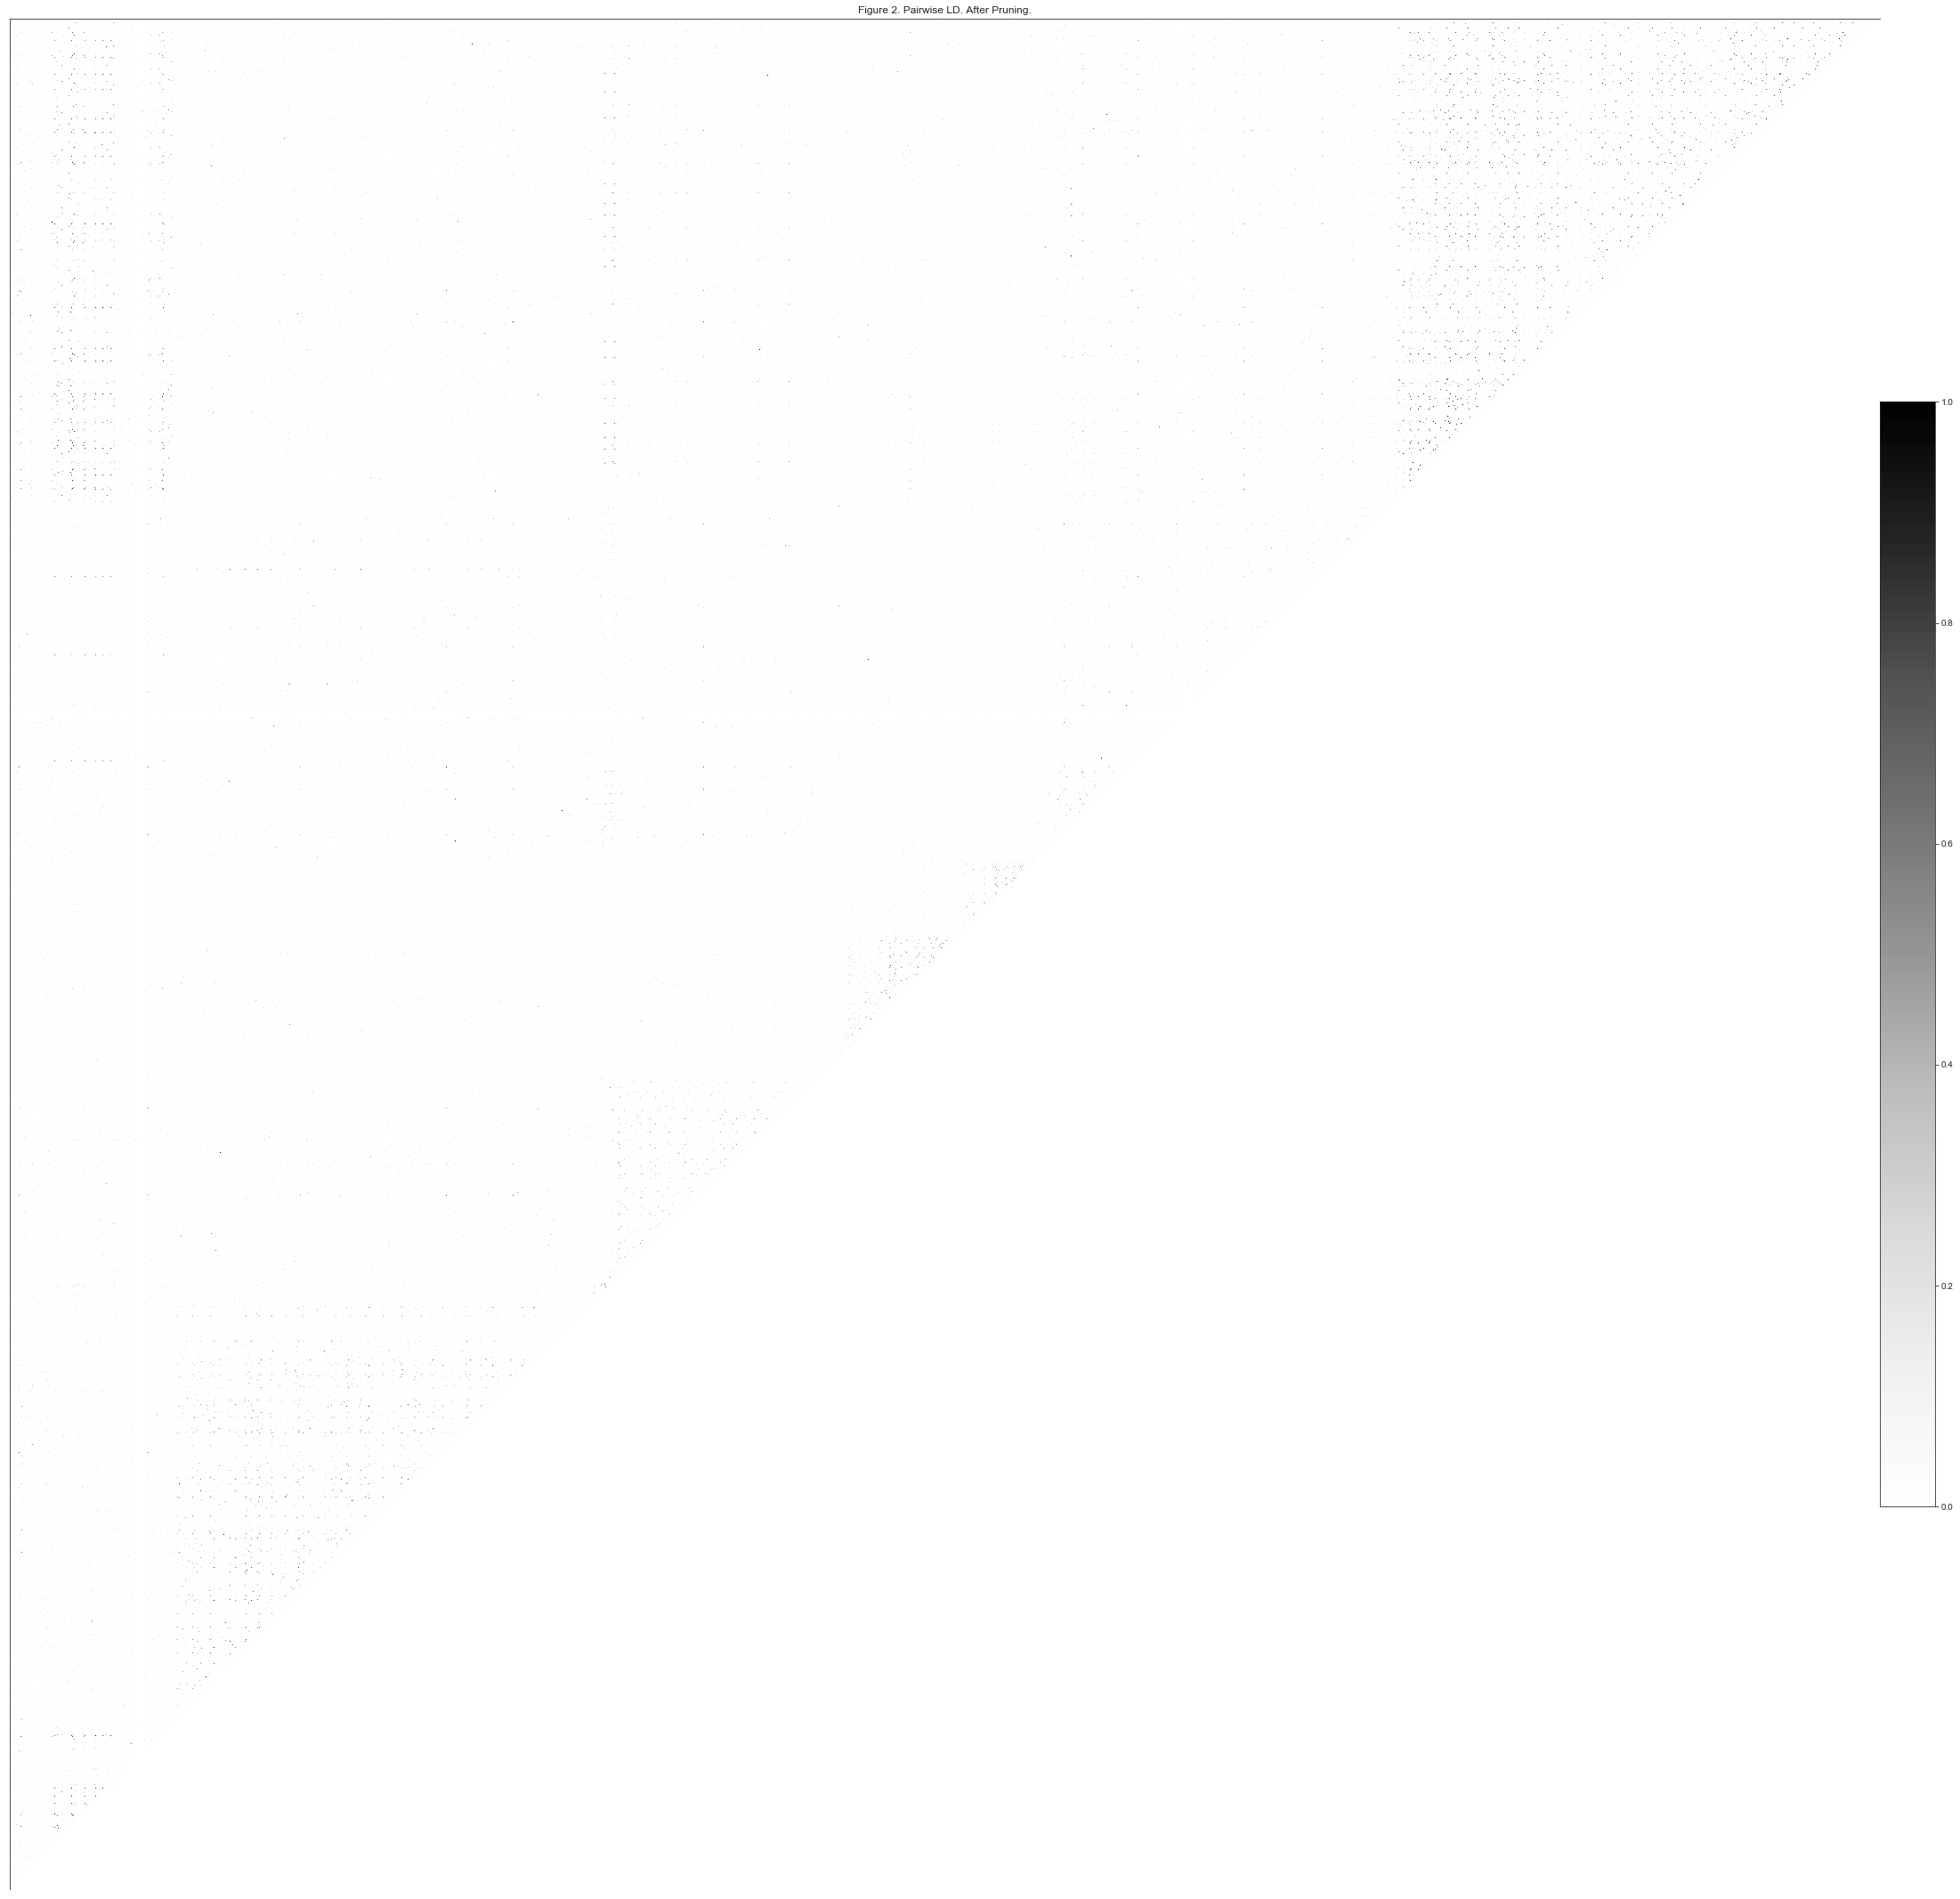

In [18]:
#reexamine our LD plot after we have pruned out the linked SNPs
plot_ld(FIN_CHS_gt_prune[:2500], 'Figure 3. Pairwise LD. After Pruning.')

*__Fig 2.__ this plot confirms that by scanning windows of SNPs in our sample genotype array and removing one pair in each linked polymorphism we are able to reduce the amount of linkage disequilibrium substantially*

In [76]:
#take our sample out of the compressed format and store it as a np array
FIN_CHS_gt_prune = FIN_CHS_gt_prune[:]
FIN_CHS_gt_prune.shape

NameError: name 'FIN_CHS_gt_prune' is not defined

In [75]:
FIN_CHS_gt_prune[:1000]

NameError: name 'FIN_CHS_gt_prune' is not defined

__Conduct for Four Subpopulations__

In [74]:
FIN_CHS_GBR_ESN_ACB_PEL_gt

<ChunkedArrayWrapper shape=(353628, 535) dtype=int8 chunks=(1959, 535)
   nbytes=180.4M cbytes=17.2M cratio=10.5
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

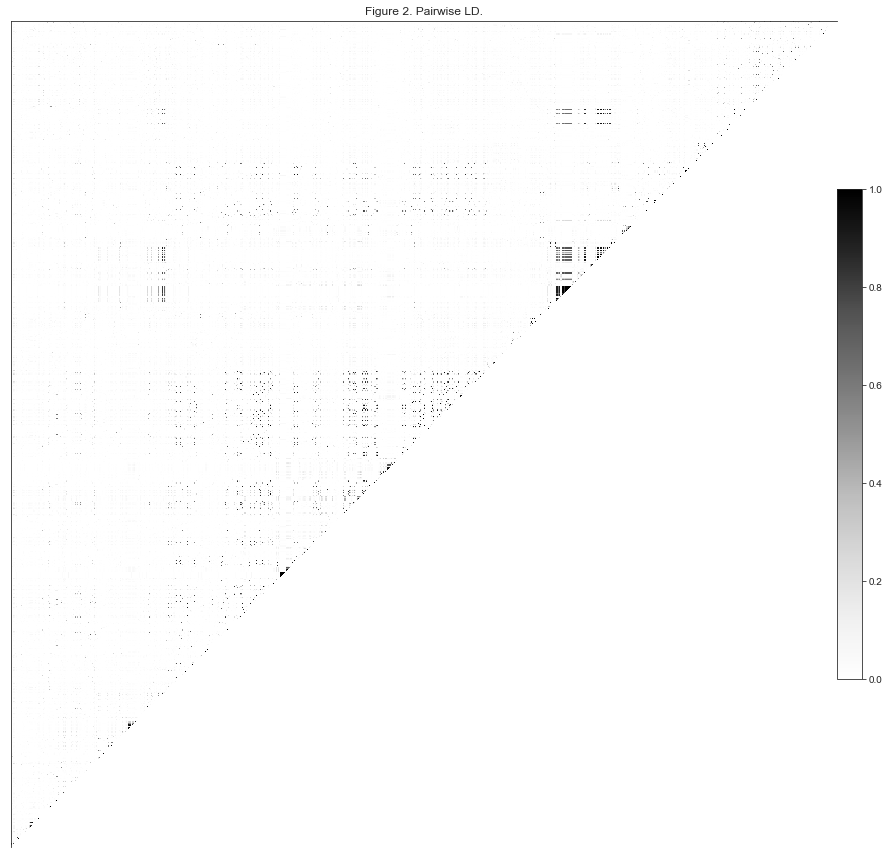

In [91]:
plot_ld(FIN_CHS_GBR_ESN_ACB_PEL_gt[:1000],'Figure 2. Pairwise LD.')

89495
iteration 1 retaining 89495 removing 264133 variants
45222
iteration 2 retaining 45222 removing 44273 variants
29993
iteration 3 retaining 29993 removing 15229 variants


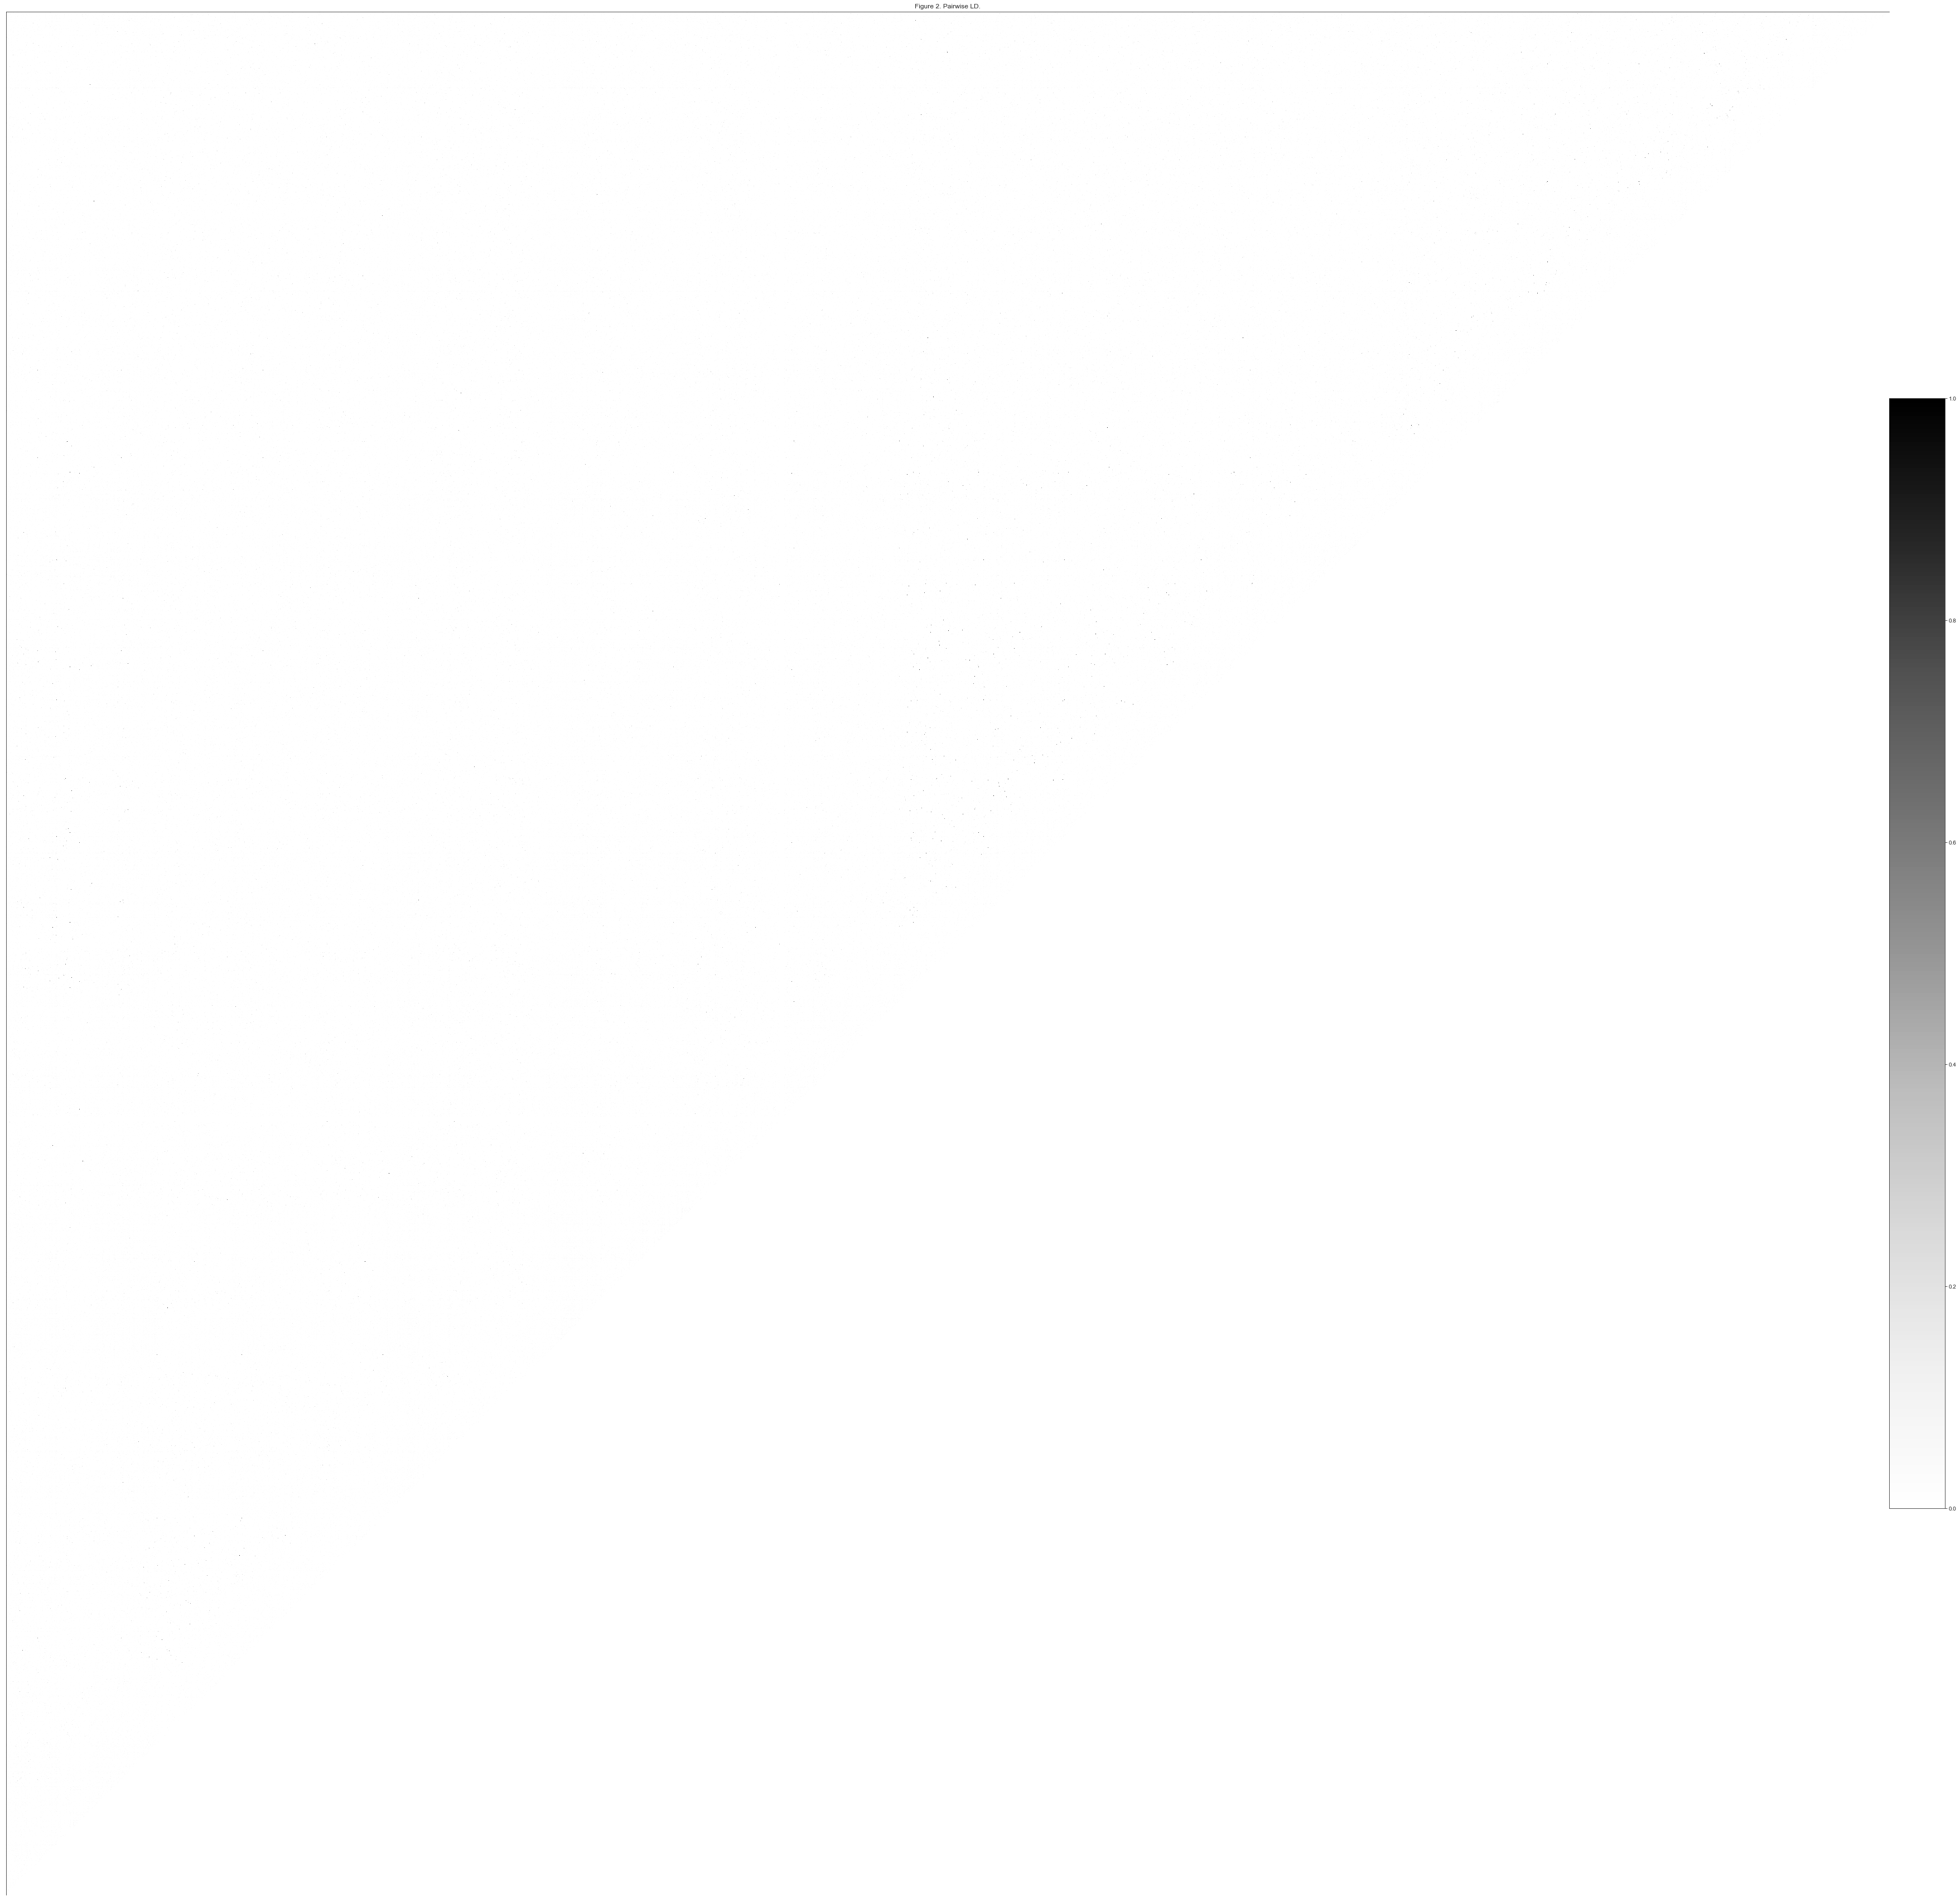

In [30]:
#create a function that takes population_gt as input and prunes the variants to remove nucleotide polymorphisms that exhibit Linkage Disequilibrium
def ld_prune(gn, size, step, threshold=.1, n_iter=1):
    for i in range(n_iter):
        loc_unlinked = allel.locate_unlinked(gn, size=size, step=step, threshold=threshold)
        n = np.count_nonzero(loc_unlinked)
        print(n)
        n_remove = gn.shape[0] - n
        print('iteration', i+1, 'retaining', n, 'removing', n_remove, 'variants')
        gn = gn.compress(loc_unlinked, axis=0)
    return gn
#run our ld prune function and reexamine our pairwise LD plot
FIN_CHS_GBR_ESN_ACB_PEL_gt_prune = ld_prune(FIN_CHS_GBR_ESN_ACB_PEL_gt, size=250, step=100, threshold=.1, n_iter=3)
plot_ld(FIN_CHS_GBR_ESN_ACB_PEL_gt_prune[:1000],'Figure 2. Pairwise LD.')

89495
iteration 1 retaining 89495 removing 264133 variants
45222
iteration 2 retaining 45222 removing 44273 variants
29993
iteration 3 retaining 29993 removing 15229 variants


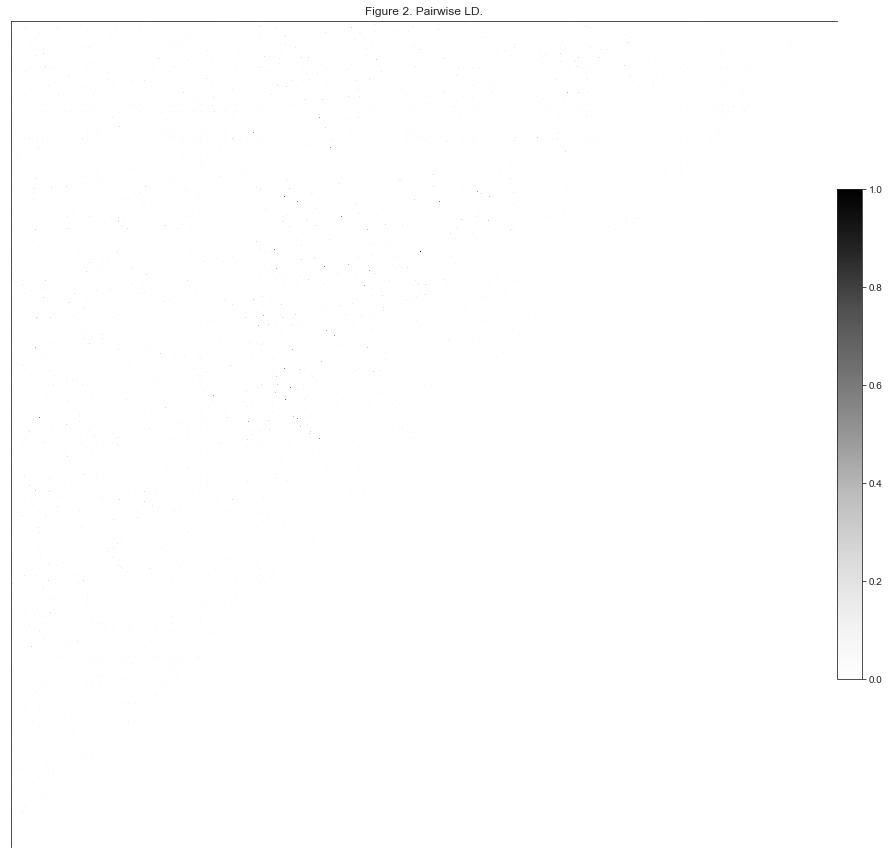

In [92]:
FIN_CHS_GBR_ESN_ACB_PEL_gt_prune = ld_prune(FIN_CHS_GBR_ESN_ACB_PEL_gt, size=250, step=100, threshold=.1, n_iter=3)
plot_ld(FIN_CHS_GBR_ESN_ACB_PEL_gt_prune[:1000],'Figure 2. Pairwise LD.')

--------

__PCA via Singular Value Decomposition__

In [24]:
#using the allel.stats.decomposition function pca we can run PCA on our gt data using Singular Value Decomposition
coords_1, model_1 = allel.pca(FIN_CHS_gt_prune, n_components = 10, scaler = 'patterson')

Text(0.5, 1.0, 'PCA Explained Variance for FIN/CHS')

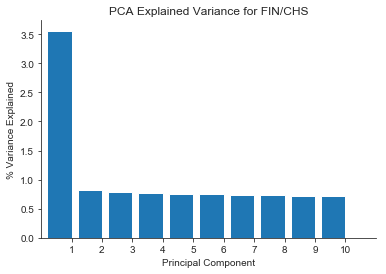

In [202]:
#lets plot the variance explained by each principal componenet
fig, ax = plt.subplots()
sns.despine(ax=ax)
x = np.arange(10)
y = model_1.explained_variance_ratio_ * 100
ax.bar(x+.6, y, width=.8)
ax.set_xticks(x+1)
ax.set_xlim(0, 11)
ax.set_xlabel('Principal Component')
ax.set_ylabel('% Variance Explained')
ax.set_title('PCA Explained Variance for FIN/CHS')

*After the initial PC which accounts for almost 3.5% of our variance each PC thereafter can account for apporximately 1% fo the variance*

In [46]:
#relabel our sample populations based on the original concatenation procedure
#so first FIN has first 100 samples and the remaining 92 members belong to the CHS population(which is what we expect)
FIN_coords = coords_1[0:100]
CHS_coords = coords_1[100:]

In [86]:
#check what one element of our PCA coords
coords_1[:,1][5]

-30.139821553706707

In [90]:
#examine what our x and y coordinates would look like
x = coords_1[:, 0]
y = coords_1[:, 1]

In [36]:
#now lets plot our new PCA coords and see if they were able to differentiate between our two populations
def plot_pca_coords(coords, model, pc1, pc2, ax, pop_start, pop_end, color, pop):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for i in range(pop_start, pop_end): 
        flt = i
        ax.plot(x[flt], y[flt], marker='o', linestyle =' ', color = color, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))

In [35]:
#going to have to generalize this function later but for now we can adjust the necessary values
def fig_pca(coords, model, title): 
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, 0, 100, 'red', 'FIN')
    plot_pca_coords(coords, model, 0, 1, ax, 100, 192,'blue', 'CHS')
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, 0, 100, 'red', 'FIN')
    plot_pca_coords(coords, model, 2, 3, ax, 100, 192,'blue', 'CHS')
    blue_mark = mpatches.Patch(color='blue', label='Finnish in Finland')
    red_mark = mpatches.Patch(color = 'red', label='Han Chinese South') 
    ax.legend(handles = [blue_mark, red_mark], bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

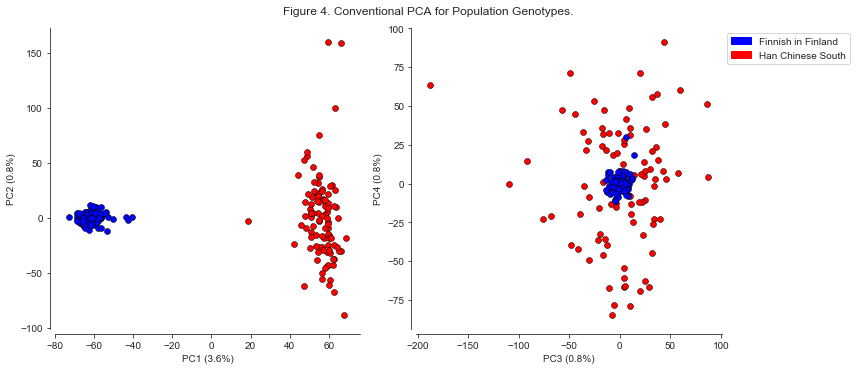

In [239]:
fig_pca(coords_1, model_1, 'Figure 4. Conventional PCA for Population Genotypes.')

________

__Second Sample Population Set__

In [203]:
#pull our data out of the compressed format
GBR_ESN_ACB_PEL_gt_prune = GBR_ESN_ACB_PEL_gt_prune[:] 
#check the shape to ensure we did everything properly
GBR_ESN_ACB_PEL_gt_prune.shape

(16729, 343)

In [204]:
coords_2, model_2 = allel.pca(GBR_ESN_ACB_PEL_gt_prune, n_components = 10, scaler = 'patterson')

In [214]:
def pca_test_and_plot(gt, pc_components): 
    gt = gt[:]
    print(gt.shape)
    coords, model = allel.pca(gt, pc_components, scaler = 'patterson') 
    #lets plot the variance explained by each principal componenet
    fig, ax = plt.subplots()
    sns.despine(ax=ax)
    x = np.arange(pc_components) 
    y = model.explained_variance_ratio_ * 100
    ax.bar(x +.6, y, width=.8)
    ax.set_xticks(x)
    ax.set_xlim(0, 11)
    ax.set_xlabel('Principal Component')
    ax.set_ylabel('% Variance Explained')
    ax.set_title('PCA Explained Variance for FIN/CHS')
    return coords, model

(16729, 343)


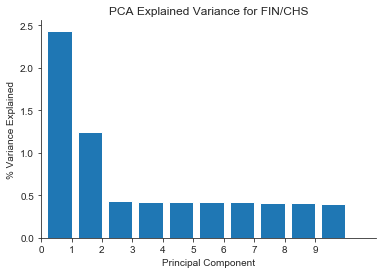

In [215]:
coords_2, model_2 = pca_test_and_plot(GBR_ESN_ACB_PEL_gt_prune, 10) 

In [213]:
#now we can reintroduce
sample_size_dict

{'GBR_gt': 97, 'ESN_gt': 100, 'ACB_gt': 78, 'PEL_gt': 68}

In [246]:
def fig_pca(coords, model, title): 
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, 0, 97, 'red', 'GBR')
    plot_pca_coords(coords, model, 0, 1, ax, 97, 197 ,'blue', 'ESN')
    plot_pca_coords(coords, model, 0, 1, ax, 197, 275,'green', 'ACB')
    plot_pca_coords(coords, model, 0, 1, ax, 275, 343,'purple', 'PEL')
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, 0, 97, 'red', 'GBR')
    plot_pca_coords(coords, model, 2, 3, ax, 97, 197 ,'blue', 'ESN')
    plot_pca_coords(coords, model, 2, 3, ax, 197, 275,'green', 'ACB')
    plot_pca_coords(coords, model, 2, 3, ax, 275, 343,'purple', 'PEL')
    blue_mark = mpatches.Patch(color='blue', label= 'British from England and Scotland')
    red_mark = mpatches.Patch(color = 'red', label= 'Esan in Nigeria') 
    green_mark = mpatches.Patch(color='green', label= 'African Caribbean in Barbados')
    purple_mark = mpatches.Patch(color='purple', label= 'Peruvian in Lima, Peru')
    ax.legend(handles = [blue_mark, red_mark, green_mark, purple_mark], bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

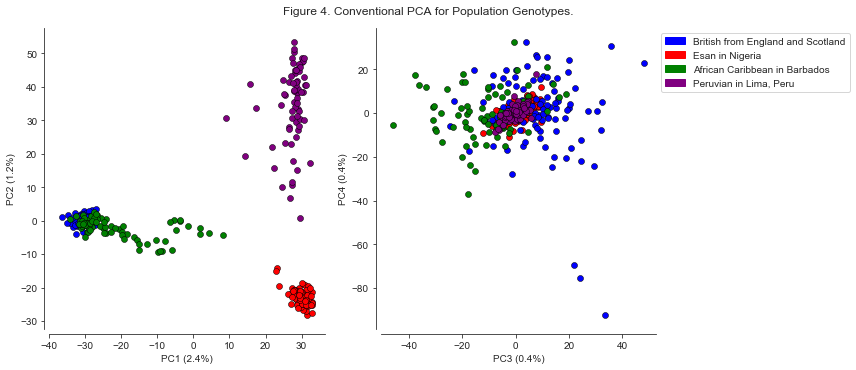

In [247]:
#run our pca_function for 
fig_pca(coords_2, model_2, 'Figure 4. Conventional PCA for Population Genotypes.')

In [248]:
#pickle our coordinates and models for these four populations
pickle.dump(coords_1,open('coords_1.pkl','wb'))
pickle.dump(model_1, open('model_1.pkl', 'wb'))
pickle.dump(coords_2, open('coords_2.pkl', 'wb')) 
pickle.dump(model_2, open('model_2.pkl', 'wb')) 

-------

Text(0.5, 1.0, 'PCA Explained Variance for Subpopulations')

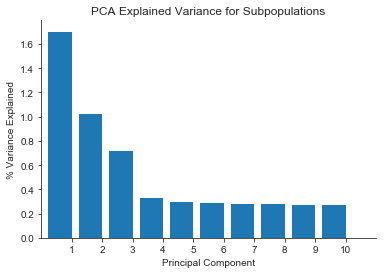

In [33]:
coords_3, model_3 = allel.pca(FIN_CHS_GBR_ESN_ACB_PEL_gt_prune, n_components = 10, scaler = 'patterson')
#lets plot the variance explained by each principal componenet
fig, ax = plt.subplots()
sns.despine(ax=ax)
x = np.arange(10)
y = model_3.explained_variance_ratio_ * 100
ax.bar(x+.6, y, width=.8)
ax.set_xticks(x+1)
ax.set_xlim(0, 11)
ax.set_xlabel('Principal Component')
ax.set_ylabel('% Variance Explained')
ax.set_title('PCA Explained Variance for Subpopulations')

In [43]:
FIN_CHS_GBR_ESN_ACB_PEL_gt_prune.shape


(29993, 535)

In [46]:
sample_size_dict['FIN'] = 100
sample_size_dict['CHS'] = 92
sample_size_dict

{'GBR_gt': 97,
 'ESN_gt': 100,
 'ACB_gt': 78,
 'PEL_gt': 68,
 'FIN': 100,
 'CHS': 92}

In [47]:
def fig_pca(coords, model, title): 
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, 0, 100, 'blue', 'FIN')
    plot_pca_coords(coords, model, 0, 1, ax, 100, 192,'red', 'CHS')
    plot_pca_coords(coords, model, 0, 1, ax, 192, 289 , 'yellow', 'GBR')
    plot_pca_coords(coords, model, 0, 1, ax, 289, 389 ,'orange', 'ESN')
    plot_pca_coords(coords, model, 0, 1, ax, 389, 467,'green', 'ACB')
    plot_pca_coords(coords, model, 0, 1, ax, 467, 535,'purple', 'PEL')
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, 0, 100, 'blue', 'FIN')
    plot_pca_coords(coords, model, 2, 3, ax, 100, 192,'red', 'CHS')
    plot_pca_coords(coords, model, 2, 3, ax, 192, 289 , 'yellow', 'GBR')
    plot_pca_coords(coords, model, 2, 3, ax, 289, 389 ,'orange', 'ESN')
    plot_pca_coords(coords, model, 2, 3, ax, 389, 467,'green', 'ACB')
    plot_pca_coords(coords, model, 2, 3, ax, 467, 535,'purple', 'PEL')
    blue_mark = mpatches.Patch(color='blue', label='Finnish in Finland')
    red_mark = mpatches.Patch(color = 'red', label='Han Chinese South') 
    yellow_mark = mpatches.Patch(color='yellow', label= 'British from England and Scotland')
    orange_mark = mpatches.Patch(color = 'orange', label= 'Esan in Nigeria') 
    green_mark = mpatches.Patch(color='green', label= 'African Caribbean in Barbados')
    purple_mark = mpatches.Patch(color='purple', label= 'Peruvian in Lima, Peru')
    ax.legend(handles = [blue_mark, red_mark,yellow_mark, orange_mark, green_mark, purple_mark], bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

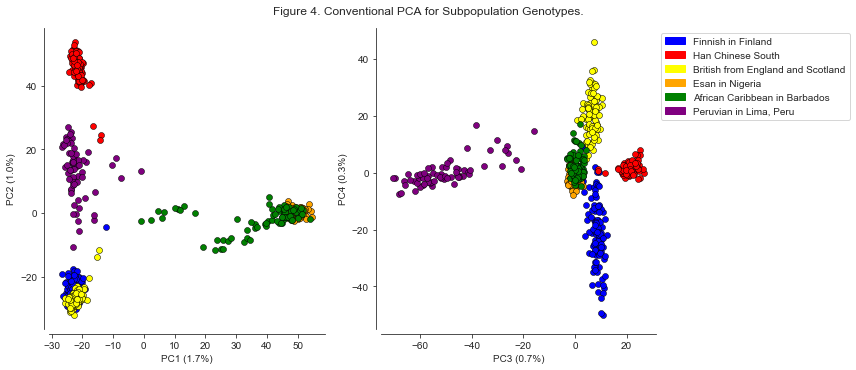

In [48]:
fig_pca(coords_3, model_3, 'Figure 4. Conventional PCA for Subpopulation Genotypes.')

In [ ]:
#pickle our coordinates and models for these four populations
pickle.dump(coords_1,open('coords_1.pkl','wb'))
pickle.dump(model_1, open('model_1.pkl', 'wb'))
pickle.dump(coords_2, open('coords_2.pkl', 'wb')) 
pickle.dump(model_2, open('model_2.pkl', 'wb'))

In [49]:
pickle.dump(model_3, open('model_3.pkl', 'wb')) 
pickle.dump(coords_3, open('coords_3.pkl', 'wb')) 

In [62]:
preprocessed_y = np.zeros(535) 
preprocessed_y[:100] = int(0) 
preprocessed_y[100:192] = int(1)
preprocessed_y[192:289] = int(2)
preprocessed_y[289:389] = int(3)
preprocessed_y[389:467] = int(4) 
preprocessed_y[467:535] = int(5)

In [66]:
#setup our variables for SVM
y = preprocessed_y
X = coords_3

In [70]:
print(X.shape)
print(y.shape)

(535, 10)
(535,)


In [61]:
sample_size_dict

{'GBR_gt': 97,
 'ESN_gt': 100,
 'ACB_gt': 78,
 'PEL_gt': 68,
 'FIN': 100,
 'CHS': 92}

In [60]:
X.shape

(535, 10)

In [72]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15)  

In [84]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [86]:
y_pred = clf.predict(X_test) 

In [87]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[16  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 1  0 19  0  0  0]
 [ 0  0  0 11  1  0]
 [ 0  0  0  4  9  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        16
         1.0       1.00      1.00      1.00        14
         2.0       1.00      0.95      0.97        20
         3.0       0.73      0.92      0.81        12
         4.0       0.90      0.69      0.78        13
         5.0       1.00      1.00      1.00         6

   micro avg       0.93      0.93      0.93        81
   macro avg       0.93      0.93      0.92        81
weighted avg       0.93      0.93      0.93        81



In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.05       0.         0.95       0.         0.         0.        ]
 [0.         0.         0.         0.91666667 0.08333333 0.        ]
 [0.         0.         0.         0.30769231 0.69230769 0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


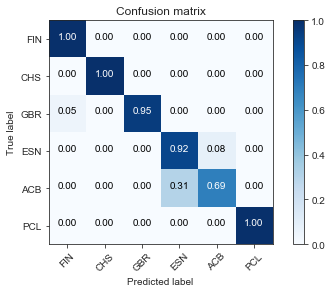

In [90]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test,y_pred), ['FIN', 'CHS', 'GBR', 'ESN', 'ACB', 'PCL'])